Summary of Simulation Progression

In [2]:
import os
import re
import pandas as pd
from collections import defaultdict

def summarize_questions(root_dir):
    summary = []

    for group_name in os.listdir(root_dir):
        group_path = os.path.join(root_dir, group_name)
        if not os.path.isdir(group_path):
            continue

        question_ids = set()
        with_images = set()
        with_model_temp = set()

        # Collect all items in the group folder
        for item in os.listdir(group_path):
            item_path = os.path.join(group_path, item)

            # Match Qxxx.txt for question IDs
            txt_match = re.match(r'^(Q\d+(?:\.\d+)?)\.txt$', item)
            if txt_match:
                qid = txt_match.group(1)
                question_ids.add(qid)

            # Match Qxxx_image folder
            img_match = re.match(r'^(Q\d+)_image$', item)
            if img_match:
                with_images.add(img_match.group(1))

            # Match Qxxx_model_temp folders
            model_match = re.match(r'^(Q\d+(?:\.\d+)?)_(gpt_4\.(?:0|1)_(?:mini|nano))_([0-9]+(?:\.\d+)?)$', item)
            if model_match:
                qid = model_match.group(1)
                model = model_match.group(2)
                temperature = float(model_match.group(3))
    
                with_model_temp.add((qid, model, temperature))

        # Derive question IDs without image
        without_images = question_ids - with_images

        # Append row to summary table
        summary.append({
            'Group Name': group_name,
            'Question IDs': sorted(list(question_ids)),
            # 'Question IDs without Image Folder': sorted(list(without_images)),
            'Question IDs with Model and Temperature': sorted(list(with_model_temp))
        })

    # Convert to DataFrame for table formatting
    df = pd.DataFrame(summary)
    return df

# Example usage
root_directory = 'Simulations/output'
summary_table = summarize_questions(root_directory)
print(summary_table.to_string(index=False))


         Group Name                                         Question IDs                                                                                                                      Question IDs with Model and Temperature
             edibnb                                           [Q31, Q32]                                                                                                                                                           []
              mouse                                           [Q53, Q54]                                                                                                                                                           []
 UK-visitor-numbers             [Q0, Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9]                                                                                                                                                           []
          Gene_Data                             [Q66, Q67, Q67.1, Q67.2]        

In [3]:
from llmds.scripts.evaluate import read_jsonl
import pandas as pd 
data = read_jsonl('GAIL-DA-tasks-questions-clean.jsonl')

In [4]:
num = len(data)
ids = [data[i]['id'] for i in range(num)]
levels = [data[i]['level'] for i in range(num)]
filenames = [data[i]['file_name'] for i in range(num)]
concepts = [data[i]['concepts'][0] for i in range(num)]

from collections import Counter

levels_counter = Counter(levels)
filenames_counter = Counter(filenames)
concepts_counter = Counter(concepts)

total_concept = sum(concepts_counter.values())
ratio_concept = {key: (value, value / total_concept) for key, value in concepts_counter.items()}

total_level = sum(levels_counter.values())
ratio_level = {key: (value, value / total_level) for key, value in levels_counter.items()}

In [5]:
ratio_level

{'easy': (22, 0.22), 'medium': (39, 0.39), 'hard': (39, 0.39)}

In [6]:
key_data = {'id':ids, 'level':levels, 'filename':filenames, 'concept':concepts}
df = pd.DataFrame(data=key_data)
df

,id,level,filename,concept
0,0.0,easy,UK-visitor-numbers.csv,Data Understanding
1,1.0,easy,UK-visitor-numbers.csv,Data Understanding
2,2.0,easy,UK-visitor-numbers.csv,Data Understanding
3,3.0,easy,UK-visitor-numbers.csv,Data Understanding
4,4.0,medium,UK-visitor-numbers.csv,Data Understanding
...,...,...,...,...
95,69.4,medium,Edinburgh_rainfall.csv,Bayesian Regression Model
96,70.0,medium,laptop_data_cleaned.csv,Descriptive Statistics
97,71.0,medium,weatherAUS.csv,Data Visualization
98,72.0,medium,laptop_data_cleaned.csv,Correlation Analysis


In [7]:
summary = []
for filename in set(filenames):
    df_file = df[df['filename'] == filename]



    summary.append([filename,
                    set(df_file['id']),
                    Counter(df_file['level']),
                    Counter(df_file['concept'])])



In [8]:
df_summary = pd.DataFrame(summary,columns=['dataset','questions','difficulty','concepts'])
df_summary

,dataset,questions,difficulty,concepts
0,,"{40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 52.0, 55.0}","{'easy': 6, 'medium': 2}","{'CI Interpretation': 1, 'Specific Description..."
1,instructional-staff.csv,"{14.2, 14.0, 14.1}","{'easy': 1, 'medium': 2}","{'Data Visualization': 2, 'Data Visualization-..."
2,mouse.txt,"{53.0, 54.0}","{'medium': 1, 'easy': 1}","{'Data Visualization': 1, 'Data Summary': 1}"
3,laptop_data_cleaned.csv,"{70.0, 72.0, 73.0, 46.0, 47.1, 48.0, 48.1, 47....","{'easy': 1, 'medium': 6, 'hard': 4}","{'Data Summary': 1, 'Data Visualization': 2, '..."
4,weatherAUS.csv,"{71.0, 30.2, 30.1, 27.0, 28.0, 29.0, 30.0}","{'easy': 1, 'medium': 3, 'hard': 3}","{'Data Transformation': 1, 'Logistic Regressio..."
5,Gene_Data.RData / Gene_Data.xlsx,"{66.0, 67.0, 67.2, 67.1}","{'medium': 2, 'hard': 2}","{'Data Description': 1, 'PCA': 1, 'Clustering'..."
6,cherryblossom_run17.xlsx,"{35.0, 36.0}",{'hard': 2},{'Data Visualization': 2}
7,aeroplane.txt,"{56.0, 57.0, 58.0}","{'medium': 2, 'hard': 1}",{'Hypothesis Testing': 3}
8,UK-visitor-numbers.csv,"{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","{'easy': 4, 'medium': 4, 'hard': 2}","{'Data Understanding': 8, 'Data Summary': 2}"
9,gss16.csv,{37.0},{'hard': 1},{'Data Cleaning-Preparation': 1}


In [9]:
df_summary.iloc[14,1]

{68.0, 68.1, 68.2}

In [10]:
df_cat = pd.DataFrame([
    [f"{k}", v[0], f"{v[1]*100:.1f}%"] for k, v in ratio_concept.items()
], columns=["Statistic", "Count", "Percentage"])

df_cat=df_cat.sort_values(by='Count',ascending=False).reset_index(drop=True)
df_cat

,Statistic,Count,Percentage
0,Data Understanding,10,10.0%
1,Data Visualization,10,10.0%
2,Data Summary,9,9.0%
3,Regression Modeling,6,6.0%
4,Bayesian Regression Model,4,4.0%
5,Logistic Regression Model,4,4.0%
6,Regression Model Diagnostics,3,3.0%
7,Hypothesis Testing,3,3.0%
8,Regression Modeling Interpretation,3,3.0%
9,Linear Regression,3,3.0%


Remain to-do: create a mapping of high-level concepts to specific concepts

In [11]:
concept_map = {
    'Data Preprocessing': ["Data Description", "Data Cleaning"],
    'Data Summary': ["Data Summary", "Data Understanding", "Function Writing - Data Summary", "Data Description"],
    'Data Visualization': ["Data Visualization", "Data Viz And EDA"],
    'Statistical Modeling': ["Regression Modeling", "Bayesian Regression Model", "Logistic Regression Model", "Linear Regression"],
    'Interpretation': ["Regression Model Diagnostics", "Regression Modeling Interpretation",],
    'Hypotesis testing': ["Hypotesis testing"]
}

In [12]:
df_total = pd.DataFrame([["Total tasks", num, "100%"]], columns=df_cat.columns)
df_diff = pd.DataFrame([
    [f"{k}", v[0], f"{v[1]*100:.1f}%"] for k, v in ratio_level.items()
], columns=["Statistic", "Count", "Percentage"])

pd.concat([df_total, df_diff], ignore_index=True)

,Statistic,Count,Percentage
0,Total tasks,100,100%
1,easy,22,22.0%
2,medium,39,39.0%
3,hard,39,39.0%


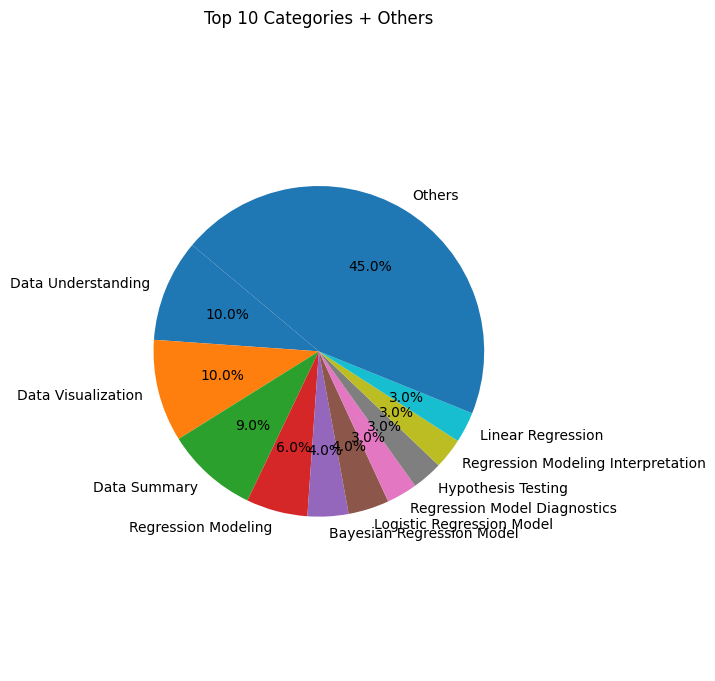

In [13]:
import matplotlib.pyplot as plt
n = 10 # number of top features

df_sorted = df_cat

top_df = df_sorted.iloc[:n].copy()
top_df["Label"] = top_df["Statistic"]

# Group the rest as 'Others'
other_count = df_sorted.iloc[n:]["Count"].sum()
other_ratio = df_sorted.iloc[n:]["Percentage"].sum()
others = pd.DataFrame([{
    "Statistic": "Others",
    "Count": other_count,
    "Percentage": other_ratio,
    "Label": "Others"
}])

# Combine top n + others
pie_df = pd.concat([top_df, others], ignore_index=True)

# Custom colors: unique for top n + one for Others
# colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d3d3d3"]  # last one is light gray for "Others"

# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    pie_df["Count"],
    labels=pie_df["Label"],
    # colors=colors,
    autopct="%1.1f%%",
    startangle=140
)
plt.title(f"Top {n} Categories + Others")
plt.axis("equal")  # Equal aspect ratio
plt.tight_layout()
plt.show()
